In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras 

In [34]:
df=pd.read_csv('C:/Users/Admin/Desktop/AIML DATASET/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
df.shape

(150, 6)

In [35]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [43]:
df['Species'] = le.fit_transform(df['Species'])
df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [45]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [47]:
print("test Accuracy: ",model.score(x_test, y_test) * 100)
print("train Accuracy: ",model.score(x_train, y_train) * 100)

test Accuracy:  95.55555555555556
train Accuracy:  98.09523809523809


In [48]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.utils import np_utils

In [49]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              5000      
                                                                 
 dense_9 (Dense)             (None, 500)               500500    
                                                                 
 dense_10 (Dense)            (None, 300)               150300    
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [51]:
from keras.utils import to_categorical

In [52]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [55]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
6/6 [==============================] - 0s 24ms/step - loss: 0.1267 - accuracy: 0.9524 - val_loss: 0.2276 - val_accuracy: 0.9333
Epoch 2/10
6/6 [==============================] - 0s 17ms/step - loss: 0.1011 - accuracy: 0.9714 - val_loss: 0.1958 - val_accuracy: 0.9111
Epoch 3/10
6/6 [==============================] - 0s 17ms/step - loss: 0.1182 - accuracy: 0.9333 - val_loss: 0.1425 - val_accuracy: 0.9111
Epoch 4/10
6/6 [==============================] - 0s 18ms/step - loss: 0.1917 - accuracy: 0.9048 - val_loss: 0.2043 - val_accuracy: 0.9333
Epoch 5/10
6/6 [==============================] - 0s 17ms/step - loss: 0.2369 - accuracy: 0.8762 - val_loss: 0.2094 - val_accuracy: 0.8889
Epoch 6/10
6/6 [==============================] - 0s 16ms/step - loss: 0.2834 - accuracy: 0.8762 - val_loss: 0.1307 - val_accuracy: 0.9556
Epoch 7/10
6/6 [==============================] - 0s 18ms/step - loss: 0.1565 - accuracy: 0.9619 - val_loss: 0.1394 - val_accuracy: 0.9556
Epoch 8/10
6/6 [===========

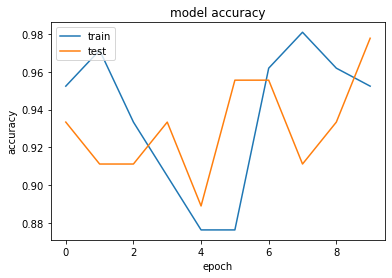

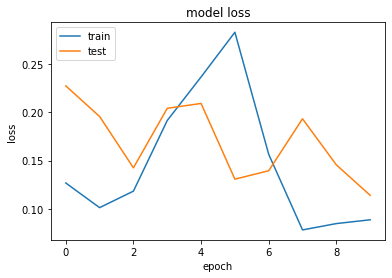

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()